Classificação de Texto Multilabel

José Augusto de Almeida Neto

## Importar bibliotecas

In [1]:
import os.path
import time
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score)
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [2]:
labels = ['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']

# RandomForest

## Carregar datasets

In [476]:
# Carregar dataset
df_fold1 = pd.read_csv('../../datasets/dataset-fold_1-multilabel.csv', encoding='utf-8')
df_fold2 = pd.read_csv('../../datasets/dataset-fold_2-multilabel.csv', encoding='utf-8')
df_fold3 = pd.read_csv('../../datasets/dataset-fold_3-multilabel.csv', encoding='utf-8')
df_fold4 = pd.read_csv('../../datasets/dataset-fold_4-multilabel.csv', encoding='utf-8')
df_fold5 = pd.read_csv('../../datasets/dataset-fold_5-multilabel.csv', encoding='utf-8')

In [477]:
# Gerar listas de métricas
accuracies = []
f1_score_list_macro = []
precision_list_macro = []
recall_list_macro = []
f1_score_list_micro = []
precision_list_micro = []
recall_list_micro = []

## 1° Fold

In [478]:
# Dividir o dataset
df = pd.concat([df_fold2, df_fold3, df_fold4, df_fold5])
train_data = df.dropna()
test_data = df_fold1.dropna()

X_train = train_data['sentenca']
y_train = train_data.drop('sentenca', axis=1)
X_test = test_data['sentenca']
y_test = test_data.drop('sentenca', axis=1)

In [479]:
# Converta as sentenças em vetores de recursos TF-IDF usando o TfidfVectorizer:
vectorizer = TfidfVectorizer(min_df=3, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [480]:
# Selecionar 40% recursos com pontuação chi2
selector = SelectPercentile(chi2, percentile=40)
X_train_tfidf = selector.fit_transform(X_train_tfidf, y_train)
X_test_tfidf = selector.transform(X_test_tfidf)

In [481]:
# Criar e treinar modelo
model = OneVsRestClassifier(RandomForestClassifier(max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100))
model.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [482]:
# Teste do modelo
predictions = model.predict(X_test_tfidf)

### Resultados

In [483]:
from sklearn.metrics import f1_score

# Resultados
predictions_df = pd.DataFrame(predictions) 
y_pred = predictions_df.values # Obter as previsões
y_true = y_test # Obter os rótulos reais dos dados de teste

accuracy = accuracy_score(y_true, y_pred)
f1_score_macro = f1_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_score_micro = f1_score(y_true, y_pred, average='micro')
precision_micro = precision_score(y_true, y_pred, average='micro')
recall_micro = recall_score(y_true, y_pred, average='micro')

# Adicionar valores das métricas para lista
accuracies.append(accuracy)
f1_score_list_macro.append(f1_score_macro)
precision_list_macro.append(precision_macro)
recall_list_macro.append(recall_macro)
f1_score_list_micro.append(f1_score_micro)
precision_list_micro.append(precision_micro)
recall_list_micro.append(recall_micro)

print("Acurácia do 1° Fold:", accuracy)
print("F1 Score Macro do 1° Fold:", f1_score_macro)
print("Precisão Macro do 1° Fold:", precision_macro)
print("Revocação Macro do 1° Fold:", recall_macro)
print("F1 Score Micro do 1° Fold:", f1_score_micro)
print("Precisão Micro do 1° Fold:", precision_micro)
print("Revocação Micro do 1° Fold:", recall_micro)

Acurácia do 1° Fold: 0.67375
F1 Score Macro do 1° Fold: 0.8267807413562603
Precisão Macro do 1° Fold: 0.8918848810915065
Revocação Macro do 1° Fold: 0.8006729049136361
F1 Score Micro do 1° Fold: 0.8791593695271454
Precisão Micro do 1° Fold: 0.9028776978417267
Revocação Micro do 1° Fold: 0.856655290102389


In [484]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']))

              precision    recall  f1-score   support

    ambiente       0.94      0.84      0.89       269
      bebida       0.84      0.87      0.85        82
      comida       0.92      0.89      0.91       418
       geral       0.72      0.72      0.72       206
 localização       0.94      0.97      0.95        30
      outros       0.86      0.27      0.41        22
       preço       0.95      0.94      0.95       161
     serviço       0.97      0.90      0.93       277

   micro avg       0.90      0.86      0.88      1465
   macro avg       0.89      0.80      0.83      1465
weighted avg       0.90      0.86      0.88      1465
 samples avg       0.86      0.84      0.84      1465



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de Confusão

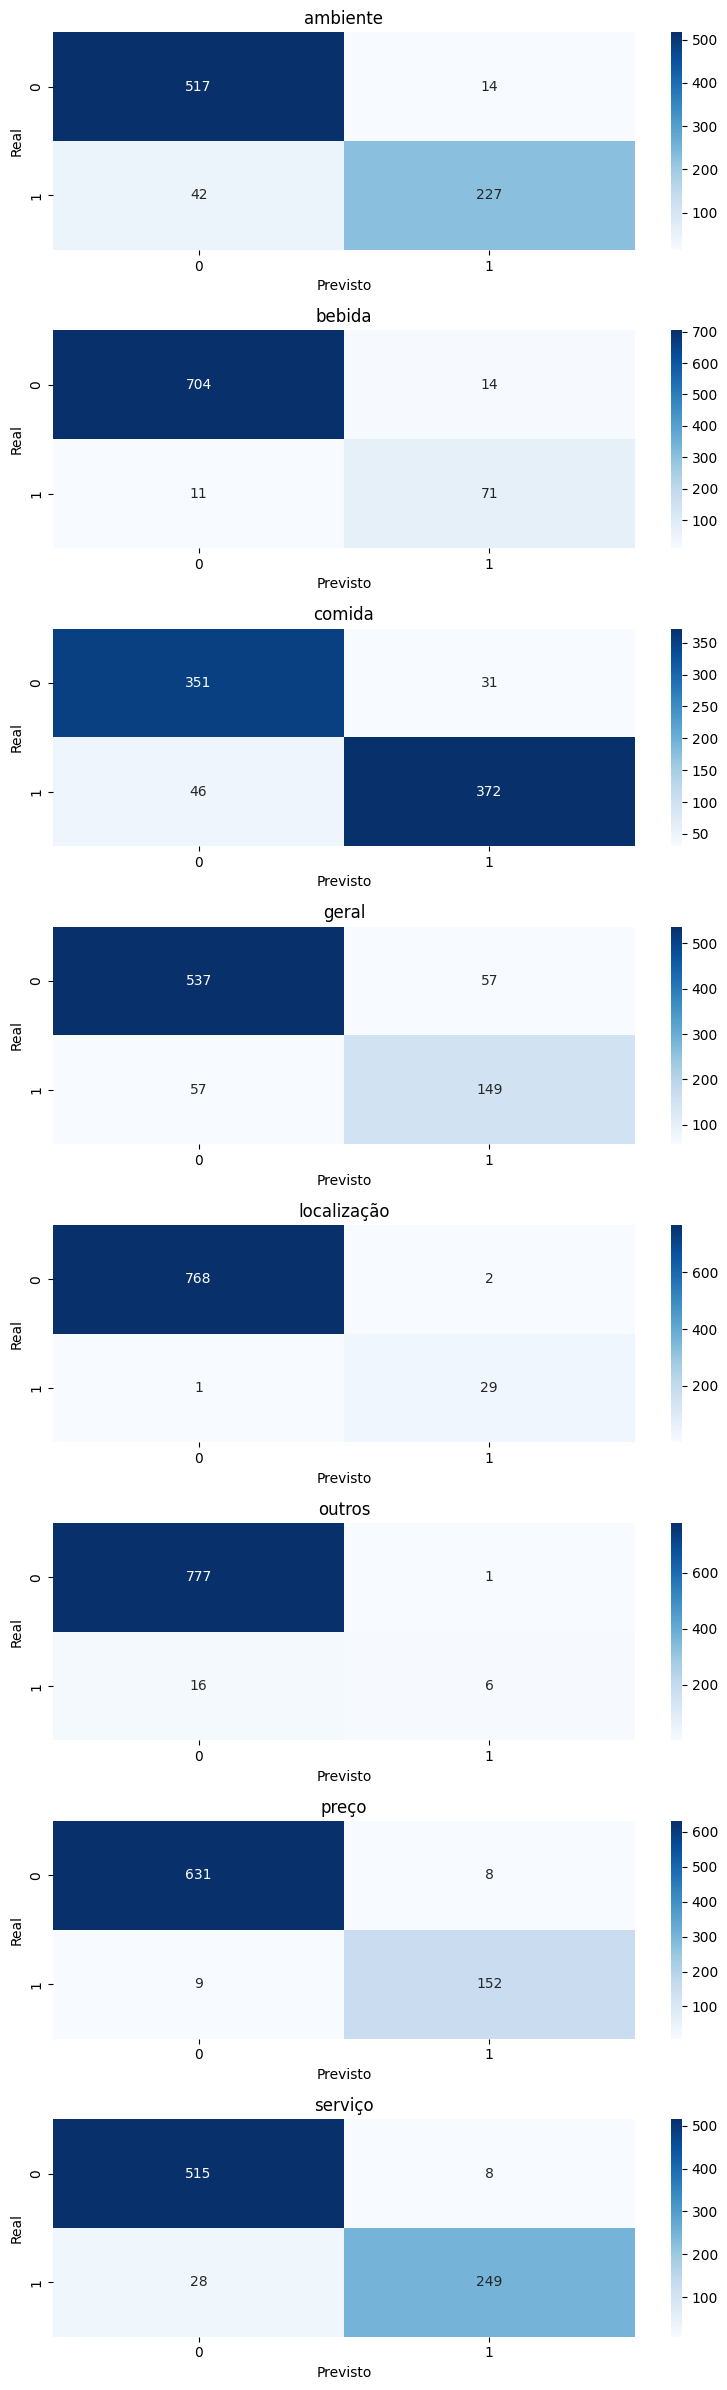

In [485]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# define as categorias correspondentes aos rótulos
category_id_df = pd.DataFrame({'categoria': labels, 'id': range(len(labels))})

# cria a matriz de confusão
conf_mat = multilabel_confusion_matrix(y_true, y_pred)

# plota as matrizes de confusão separadamente para cada categoria
fig, axes = plt.subplots(nrows=len(category_id_df), ncols=1, figsize=(8, 24))
for i, ax in enumerate(axes.flat):
    sns.heatmap(conf_mat[i], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set(xlabel='Previsto', ylabel='Real', title=category_id_df.iloc[i]['categoria'])
plt.tight_layout()
plt.show()



## 2° Fold

In [486]:
# Dividir o dataset
df = pd.concat([df_fold1, df_fold3, df_fold4, df_fold5])
train_data = df.dropna()
test_data = df_fold2.dropna()

X_train = train_data['sentenca']
y_train = train_data.drop('sentenca', axis=1)
X_test = test_data['sentenca']
y_test = test_data.drop('sentenca', axis=1)

In [487]:
# Converta as sentenças em vetores de recursos TF-IDF usando o TfidfVectorizer:
vectorizer = TfidfVectorizer(min_df=3, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [488]:
# Selecionar 40% recursos com pontuação chi2
selector = SelectPercentile(chi2, percentile=40)
X_train_tfidf = selector.fit_transform(X_train_tfidf, y_train)
X_test_tfidf = selector.transform(X_test_tfidf)

In [489]:
# Criar e treinar modelo
model = OneVsRestClassifier(RandomForestClassifier(max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100))
model.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [490]:
# Teste do modelo
predictions = model.predict(X_test_tfidf)

### Resultados

In [491]:
from sklearn.metrics import f1_score

# Resultados
predictions_df = pd.DataFrame(predictions) 
y_pred = predictions_df.values # Obter as previsões
y_true = y_test # Obter os rótulos reais dos dados de teste

accuracy = accuracy_score(y_true, y_pred)
f1_score_macro = f1_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_score_micro = f1_score(y_true, y_pred, average='micro')
precision_micro = precision_score(y_true, y_pred, average='micro')
recall_micro = recall_score(y_true, y_pred, average='micro')

# Adicionar valores das métricas para lista
accuracies.append(accuracy)
f1_score_list_macro.append(f1_score_macro)
precision_list_macro.append(precision_macro)
recall_list_macro.append(recall_macro)
f1_score_list_micro.append(f1_score_micro)
precision_list_micro.append(precision_micro)
recall_list_micro.append(recall_micro)

print("Acurácia do 2° Fold:", accuracy)
print("F1 Score Macro do 2° Fold:", f1_score_macro)
print("Precisão Macro do 2° Fold:", precision_macro)
print("Revocação Macro do 2° Fold:", recall_macro)
print("F1 Score Micro do 2° Fold:", f1_score_micro)
print("Precisão Micro do 2° Fold:", precision_micro)
print("Revocação Micro do 2° Fold:", recall_micro)

Acurácia do 2° Fold: 0.67
F1 Score Macro do 2° Fold: 0.8152371504425622
Precisão Macro do 2° Fold: 0.8973400626133636
Revocação Macro do 2° Fold: 0.77822857800194
F1 Score Micro do 2° Fold: 0.8775292864749734
Precisão Micro do 2° Fold: 0.9015317286652079
Revocação Micro do 2° Fold: 0.8547717842323651


In [492]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']))

              precision    recall  f1-score   support

    ambiente       0.94      0.87      0.90       241
      bebida       0.91      0.74      0.82        72
      comida       0.91      0.93      0.92       401
       geral       0.74      0.73      0.74       243
 localização       0.88      0.91      0.90        33
      outros       0.86      0.25      0.39        24
       preço       0.96      0.91      0.94       152
     serviço       0.98      0.89      0.93       280

   micro avg       0.90      0.85      0.88      1446
   macro avg       0.90      0.78      0.82      1446
weighted avg       0.90      0.85      0.87      1446
 samples avg       0.85      0.84      0.84      1446



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de Confusão

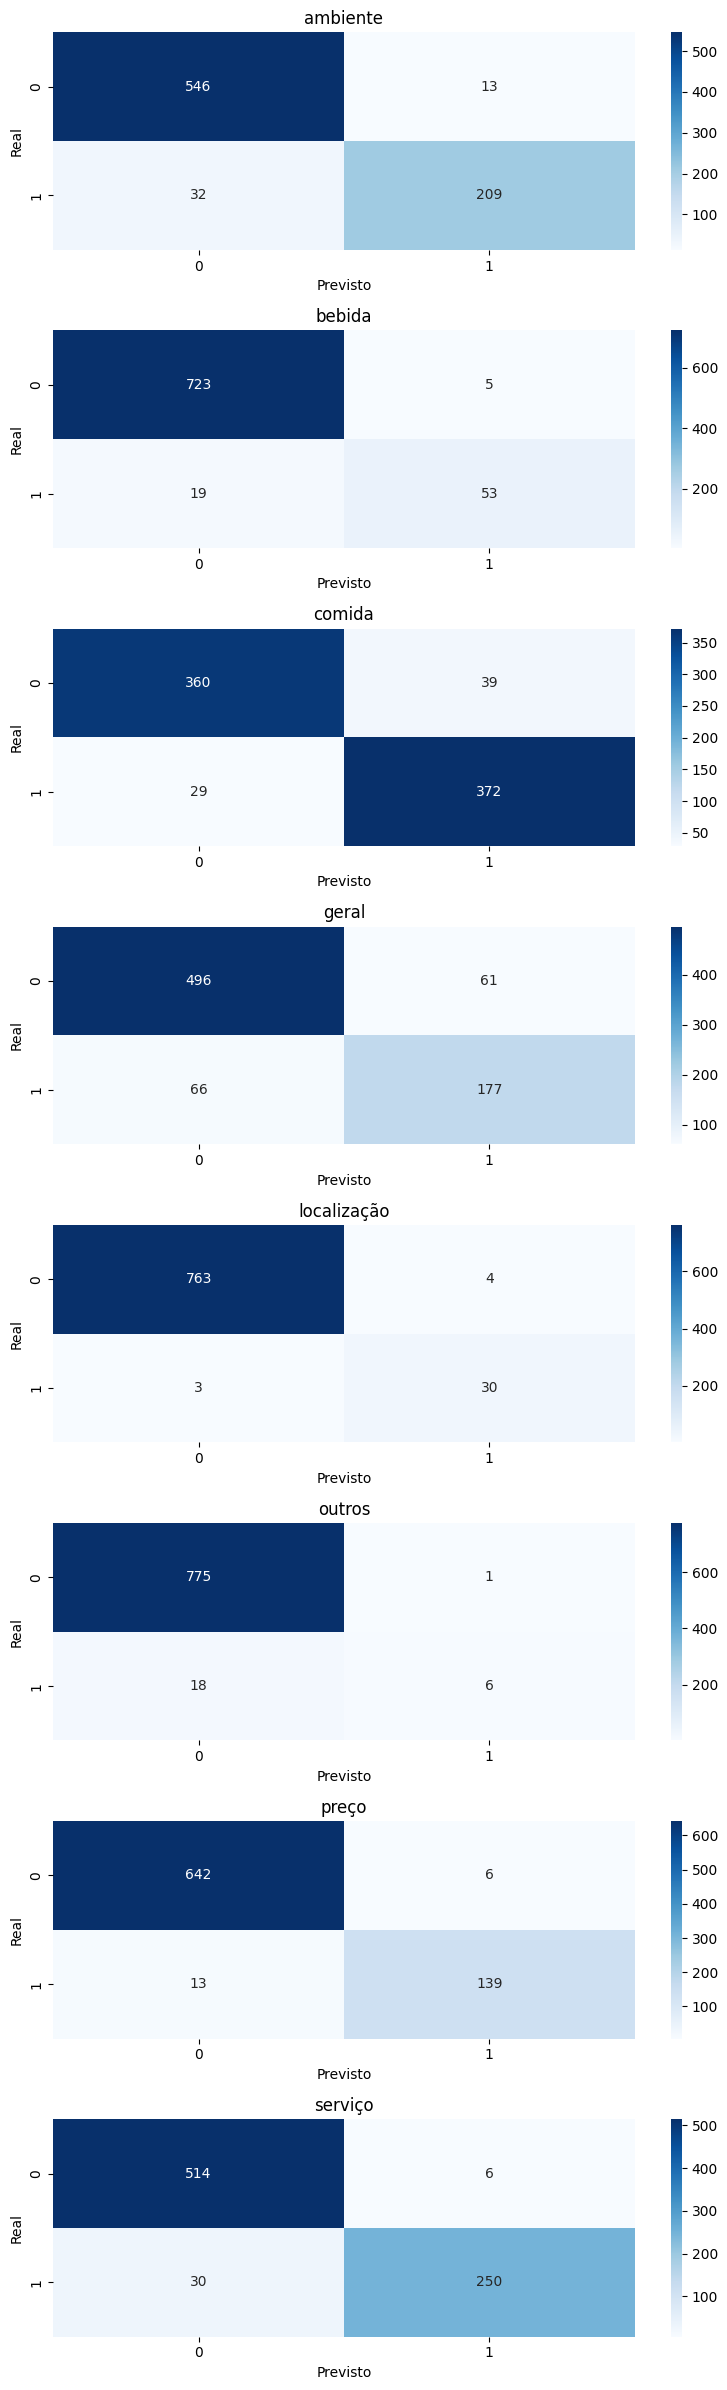

In [493]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# define as categorias correspondentes aos rótulos
category_id_df = pd.DataFrame({'categoria': labels, 'id': range(len(labels))})

# cria a matriz de confusão
conf_mat = multilabel_confusion_matrix(y_true, y_pred)

# plota as matrizes de confusão separadamente para cada categoria
fig, axes = plt.subplots(nrows=len(category_id_df), ncols=1, figsize=(8, 24))
for i, ax in enumerate(axes.flat):
    sns.heatmap(conf_mat[i], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set(xlabel='Previsto', ylabel='Real', title=category_id_df.iloc[i]['categoria'])
plt.tight_layout()
plt.show()



## 3° Fold

In [494]:
# Dividir o dataset
df = pd.concat([df_fold2, df_fold1, df_fold4, df_fold5])
train_data = df.dropna()
test_data = df_fold3.dropna()

X_train = train_data['sentenca']
y_train = train_data.drop('sentenca', axis=1)
X_test = test_data['sentenca']
y_test = test_data.drop('sentenca', axis=1)

In [495]:
# Converta as sentenças em vetores de recursos TF-IDF usando o TfidfVectorizer:
vectorizer = TfidfVectorizer(min_df=3, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [496]:
# Selecionar 40% recursos com pontuação chi2
selector = SelectPercentile(chi2, percentile=40)
X_train_tfidf = selector.fit_transform(X_train_tfidf, y_train)
X_test_tfidf = selector.transform(X_test_tfidf)

In [497]:
# Criar e treinar modelo
model = OneVsRestClassifier(RandomForestClassifier(max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100))
model.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [498]:
# Teste do modelo
predictions = model.predict(X_test_tfidf)

### Resultados

In [499]:
from sklearn.metrics import f1_score

# Resultados
predictions_df = pd.DataFrame(predictions) 
y_pred = predictions_df.values # Obter as previsões
y_true = y_test # Obter os rótulos reais dos dados de teste

accuracy = accuracy_score(y_true, y_pred)
f1_score_macro = f1_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_score_micro = f1_score(y_true, y_pred, average='micro')
precision_micro = precision_score(y_true, y_pred, average='micro')
recall_micro = recall_score(y_true, y_pred, average='micro')

# Adicionar valores das métricas para lista
accuracies.append(accuracy)
f1_score_list_macro.append(f1_score_macro)
precision_list_macro.append(precision_macro)
recall_list_macro.append(recall_macro)
f1_score_list_micro.append(f1_score_micro)
precision_list_micro.append(precision_micro)
recall_list_micro.append(recall_micro)

print("Acurácia do 3° Fold:", accuracy)
print("F1 Score Macro do 3° Fold:", f1_score_macro)
print("Precisão Macro do 3° Fold:", precision_macro)
print("Revocação Macro do 3° Fold:", recall_macro)
print("F1 Score Micro do 3° Fold:", f1_score_micro)
print("Precisão Micro do 3° Fold:", precision_micro)
print("Revocação Micro do 3° Fold:", recall_micro)

Acurácia do 3° Fold: 0.64625
F1 Score Macro do 3° Fold: 0.8029652782253079
Precisão Macro do 3° Fold: 0.9258176188542975
Revocação Macro do 3° Fold: 0.767184907836207
F1 Score Micro do 3° Fold: 0.8750430292598967
Precisão Micro do 3° Fold: 0.910458452722063
Revocação Micro do 3° Fold: 0.8422796554009278


In [500]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']))

              precision    recall  f1-score   support

    ambiente       0.97      0.87      0.92       245
      bebida       0.85      0.84      0.85        83
      comida       0.91      0.88      0.89       424
       geral       0.77      0.69      0.73       254
 localização       0.98      0.92      0.95        48
      outros       1.00      0.12      0.22        24
       preço       0.96      0.89      0.92       161
     serviço       0.97      0.92      0.94       270

   micro avg       0.91      0.84      0.88      1509
   macro avg       0.93      0.77      0.80      1509
weighted avg       0.91      0.84      0.87      1509
 samples avg       0.86      0.83      0.83      1509



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de Confusão

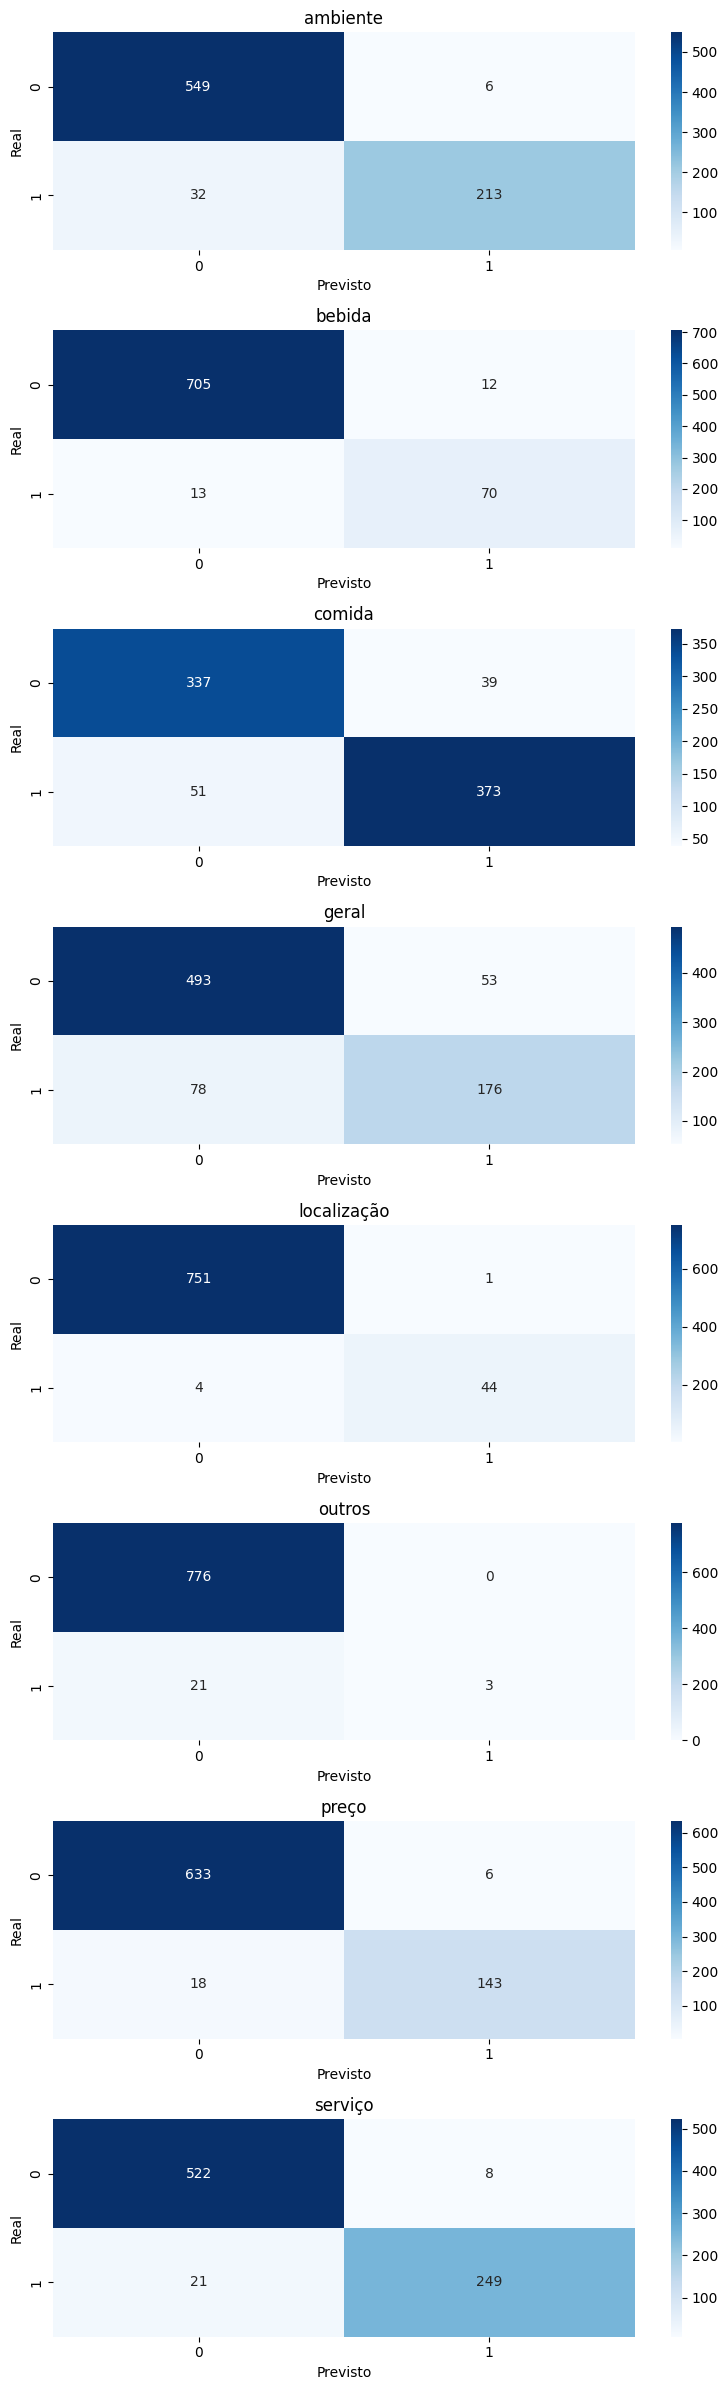

In [501]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# define as categorias correspondentes aos rótulos
category_id_df = pd.DataFrame({'categoria': labels, 'id': range(len(labels))})

# cria a matriz de confusão
conf_mat = multilabel_confusion_matrix(y_true, y_pred)

# plota as matrizes de confusão separadamente para cada categoria
fig, axes = plt.subplots(nrows=len(category_id_df), ncols=1, figsize=(8, 24))
for i, ax in enumerate(axes.flat):
    sns.heatmap(conf_mat[i], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set(xlabel='Previsto', ylabel='Real', title=category_id_df.iloc[i]['categoria'])
plt.tight_layout()
plt.show()



## 4° Fold

In [502]:
# Dividir o dataset
df = pd.concat([df_fold2, df_fold3, df_fold1, df_fold5])
train_data = df.dropna()
test_data = df_fold4.dropna()

X_train = train_data['sentenca']
y_train = train_data.drop('sentenca', axis=1)
X_test = test_data['sentenca']
y_test = test_data.drop('sentenca', axis=1)

In [503]:
# Converta as sentenças em vetores de recursos TF-IDF usando o TfidfVectorizer:
vectorizer = TfidfVectorizer(min_df=3, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [504]:
# Selecionar 40% recursos com pontuação chi2
selector = SelectPercentile(chi2, percentile=40)
X_train_tfidf = selector.fit_transform(X_train_tfidf, y_train)
X_test_tfidf = selector.transform(X_test_tfidf)

In [505]:
# Criar e treinar modelo
model = OneVsRestClassifier(RandomForestClassifier(max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100))
model.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [506]:
# Teste do modelo
predictions = model.predict(X_test_tfidf)

### Resultados

In [507]:
from sklearn.metrics import f1_score

# Resultados
predictions_df = pd.DataFrame(predictions) 
y_pred = predictions_df.values # Obter as previsões
y_true = y_test # Obter os rótulos reais dos dados de teste

accuracy = accuracy_score(y_true, y_pred)
f1_score_macro = f1_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_score_micro = f1_score(y_true, y_pred, average='micro')
precision_micro = precision_score(y_true, y_pred, average='micro')
recall_micro = recall_score(y_true, y_pred, average='micro')

# Adicionar valores das métricas para lista
accuracies.append(accuracy)
f1_score_list_macro.append(f1_score_macro)
precision_list_macro.append(precision_macro)
recall_list_macro.append(recall_macro)
f1_score_list_micro.append(f1_score_micro)
precision_list_micro.append(precision_micro)
recall_list_micro.append(recall_micro)

print("Acurácia do 4° Fold:", accuracy)
print("F1 Score Macro do 4° Fold:", f1_score_macro)
print("Precisão Macro do 4° Fold:", precision_macro)
print("Revocação Macro do 4° Fold:", recall_macro)
print("F1 Score Micro do 4° Fold:", f1_score_micro)
print("Precisão Micro do 4° Fold:", precision_micro)
print("Revocação Micro do 4° Fold:", recall_micro)

Acurácia do 4° Fold: 0.6625
F1 Score Macro do 4° Fold: 0.7867966842249751
Precisão Macro do 4° Fold: 0.8334433382298276
Revocação Macro do 4° Fold: 0.7528635633401961
F1 Score Micro do 4° Fold: 0.8827913279132792
Precisão Micro do 4° Fold: 0.9188998589562765
Revocação Micro do 4° Fold: 0.8494132985658409


In [508]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']))

              precision    recall  f1-score   support

    ambiente       0.95      0.86      0.90       264
      bebida       0.89      0.82      0.85        93
      comida       0.91      0.90      0.91       431
       geral       0.80      0.67      0.73       246
 localização       0.95      0.83      0.89        48
      outros       0.20      0.06      0.10        16
       preço       0.99      0.97      0.98       143
     serviço       0.97      0.92      0.95       293

   micro avg       0.92      0.85      0.88      1534
   macro avg       0.83      0.75      0.79      1534
weighted avg       0.91      0.85      0.88      1534
 samples avg       0.88      0.84      0.85      1534



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de Confusão

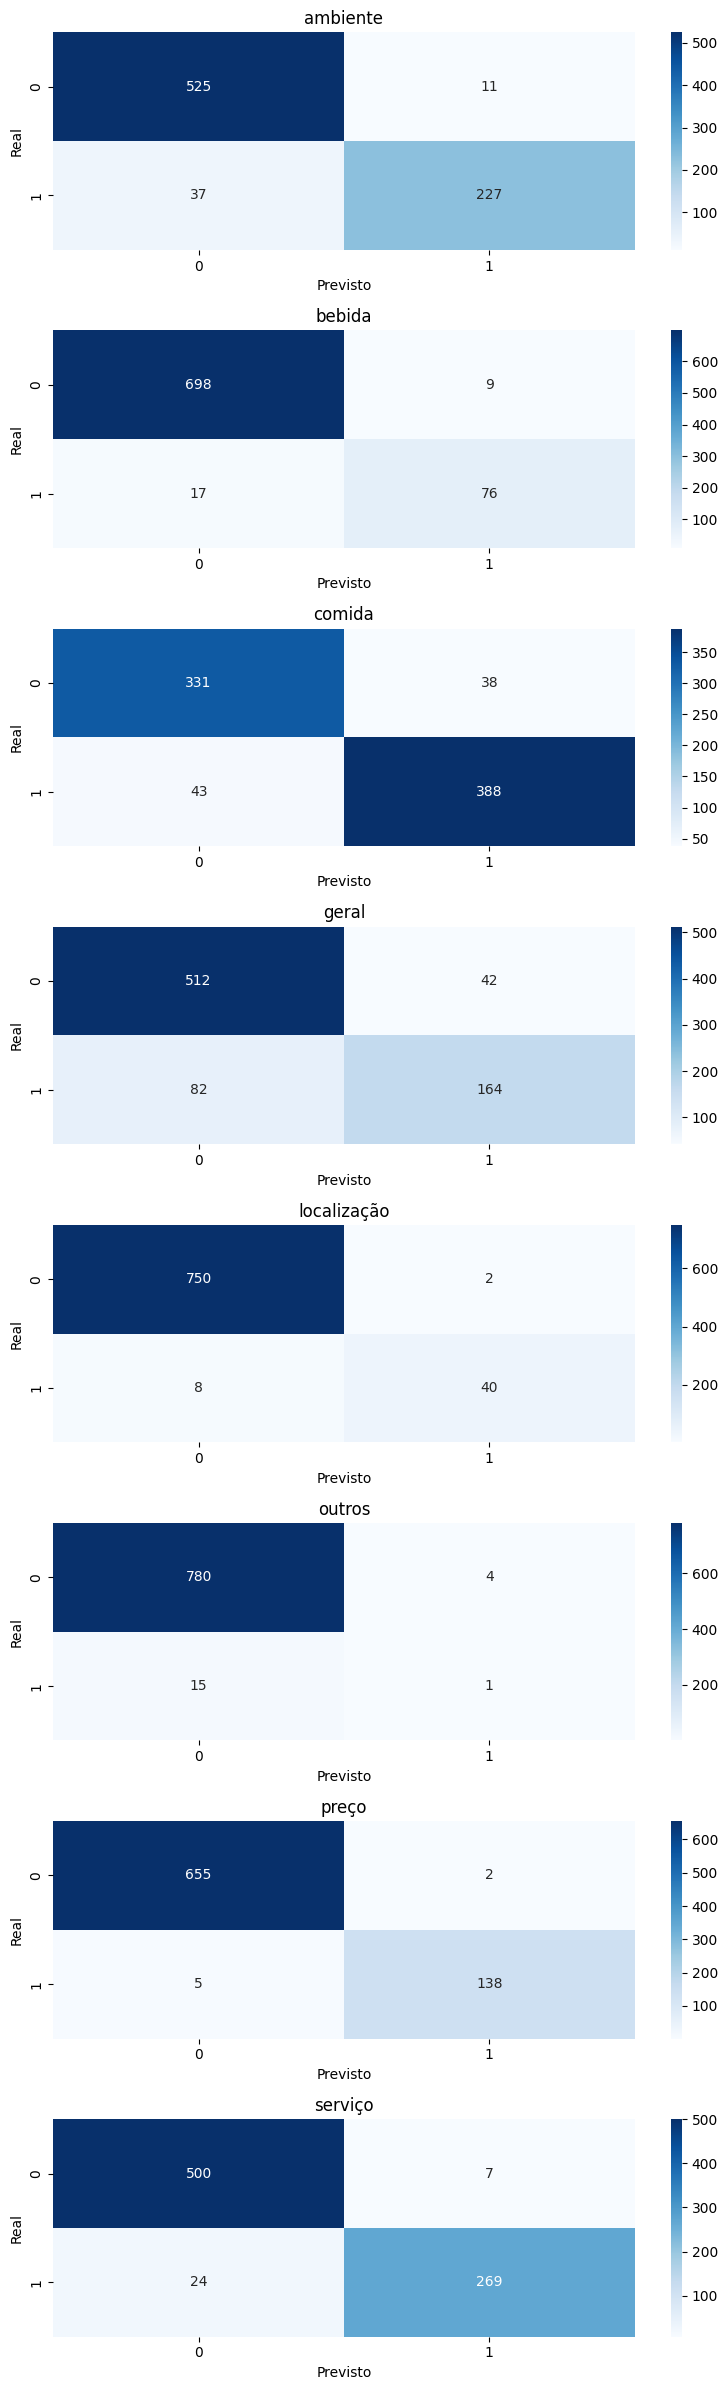

In [509]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# define as categorias correspondentes aos rótulos
category_id_df = pd.DataFrame({'categoria': labels, 'id': range(len(labels))})

# cria a matriz de confusão
conf_mat = multilabel_confusion_matrix(y_true, y_pred)

# plota as matrizes de confusão separadamente para cada categoria
fig, axes = plt.subplots(nrows=len(category_id_df), ncols=1, figsize=(8, 24))
for i, ax in enumerate(axes.flat):
    sns.heatmap(conf_mat[i], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set(xlabel='Previsto', ylabel='Real', title=category_id_df.iloc[i]['categoria'])
plt.tight_layout()
plt.show()



## 5° Fold

In [510]:
# Dividir o dataset
df = pd.concat([df_fold2, df_fold3, df_fold4, df_fold1])
train_data = df.dropna()
test_data = df_fold5.dropna()

X_train = train_data['sentenca']
y_train = train_data.drop('sentenca', axis=1)
X_test = test_data['sentenca']
y_test = test_data.drop('sentenca', axis=1)

In [511]:
# Converta as sentenças em vetores de recursos TF-IDF usando o TfidfVectorizer:
vectorizer = TfidfVectorizer(min_df=3, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [512]:
# Selecionar 40% recursos com pontuação chi2
selector = SelectPercentile(chi2, percentile=40)
X_train_tfidf = selector.fit_transform(X_train_tfidf, y_train)
X_test_tfidf = selector.transform(X_test_tfidf)

In [513]:
# Criar e treinar modelo
model = OneVsRestClassifier(RandomForestClassifier(max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100))
model.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [514]:
# Teste do modelo
predictions = model.predict(X_test_tfidf)

### Resultados

In [515]:
from sklearn.metrics import f1_score

# Resultados
predictions_df = pd.DataFrame(predictions) 
y_pred = predictions_df.values # Obter as previsões
y_true = y_test # Obter os rótulos reais dos dados de teste

accuracy = accuracy_score(y_true, y_pred)
f1_score_macro = f1_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_score_micro = f1_score(y_true, y_pred, average='micro')
precision_micro = precision_score(y_true, y_pred, average='micro')
recall_micro = recall_score(y_true, y_pred, average='micro')

# Adicionar valores das métricas para lista
accuracies.append(accuracy)
f1_score_list_macro.append(f1_score_macro)
precision_list_macro.append(precision_macro)
recall_list_macro.append(recall_macro)
f1_score_list_micro.append(f1_score_micro)
precision_list_micro.append(precision_micro)
recall_list_micro.append(recall_micro)

print("Acurácia do 5° Fold:", accuracy)
print("F1 Score Macro do 5° Fold:", f1_score_macro)
print("Precisão Macro do 5° Fold:", precision_macro)
print("Revocação Macro do 5° Fold:", recall_macro)
print("F1 Score Micro do 5° Fold:", f1_score_micro)
print("Precisão Micro do 5° Fold:", precision_micro)
print("Revocação Micro do 5° Fold:", recall_micro)

Acurácia do 5° Fold: 0.6475
F1 Score Macro do 5° Fold: 0.784984082648436
Precisão Macro do 5° Fold: 0.8645166354734671
Revocação Macro do 5° Fold: 0.743200939203704
F1 Score Micro do 5° Fold: 0.8736512356421859
Precisão Micro do 5° Fold: 0.9061371841155235
Revocação Micro do 5° Fold: 0.8434139784946236


In [516]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']))

              precision    recall  f1-score   support

    ambiente       0.95      0.83      0.89       238
      bebida       0.86      0.76      0.81        74
      comida       0.91      0.88      0.89       417
       geral       0.77      0.73      0.75       244
 localização       0.89      0.74      0.81        42
      outros       0.60      0.15      0.24        20
       preço       0.98      0.92      0.95       167
     serviço       0.95      0.94      0.95       286

   micro avg       0.91      0.84      0.87      1488
   macro avg       0.86      0.74      0.78      1488
weighted avg       0.90      0.84      0.87      1488
 samples avg       0.86      0.84      0.83      1488



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de Confusão

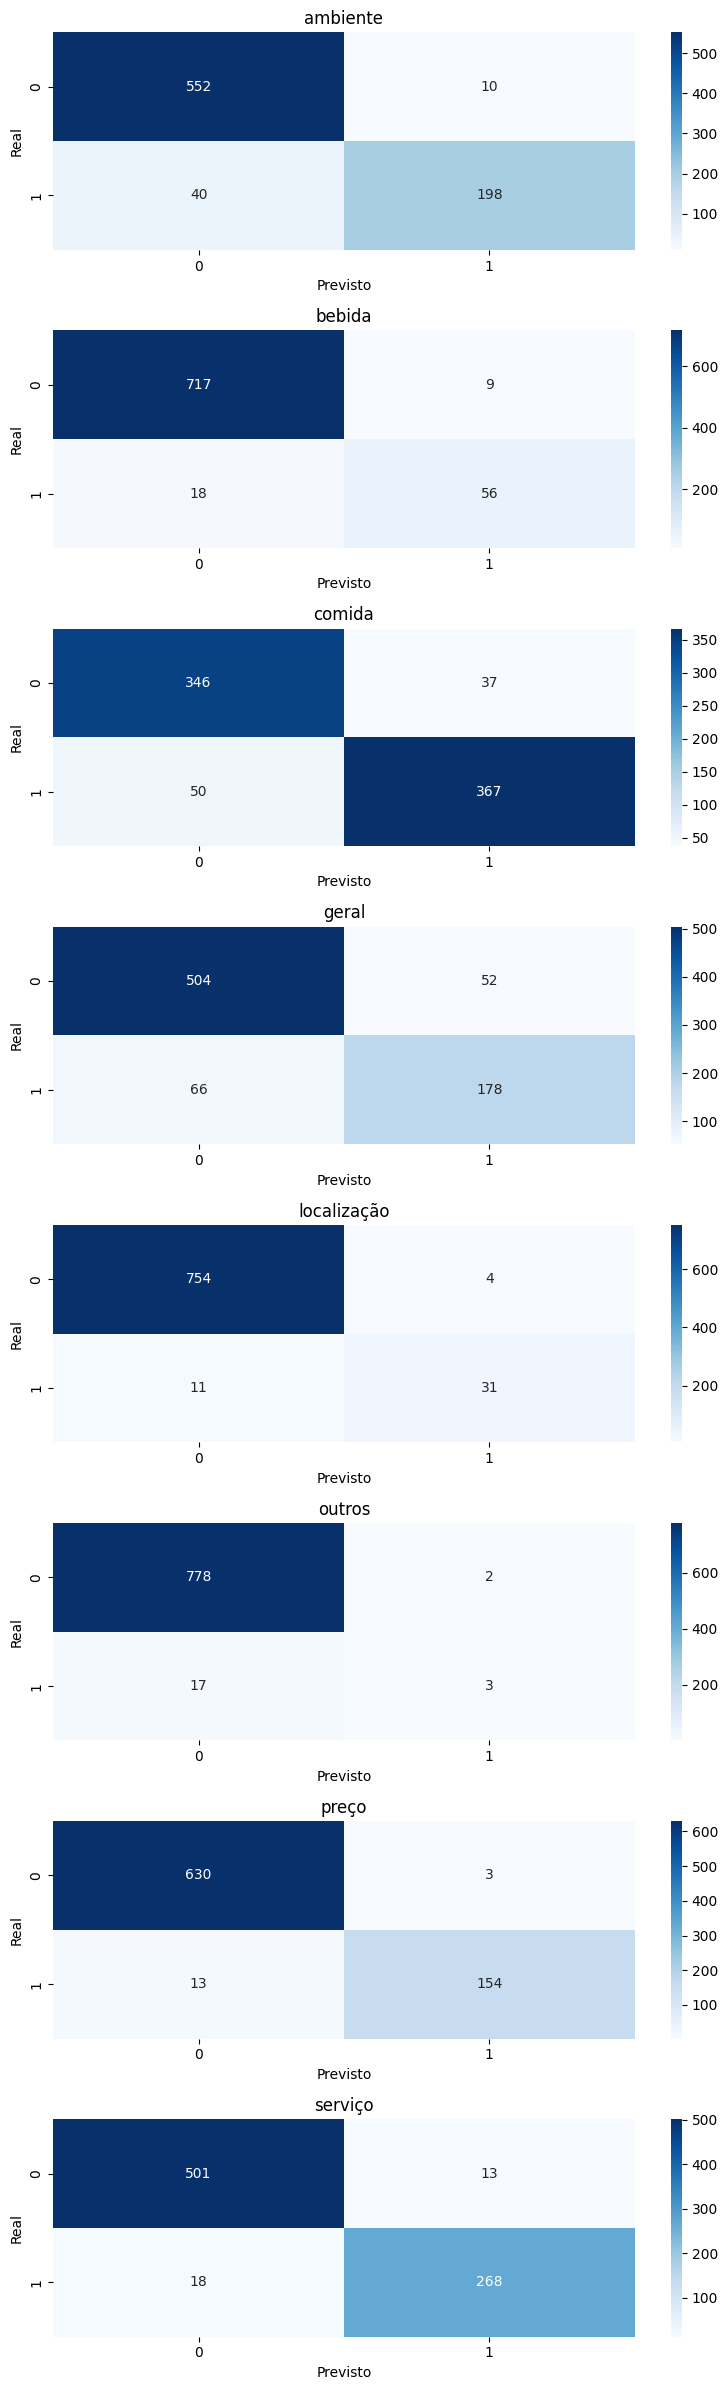

In [517]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# define as categorias correspondentes aos rótulos
category_id_df = pd.DataFrame({'categoria': labels, 'id': range(len(labels))})

# cria a matriz de confusão
conf_mat = multilabel_confusion_matrix(y_true, y_pred)

# plota as matrizes de confusão separadamente para cada categoria
fig, axes = plt.subplots(nrows=len(category_id_df), ncols=1, figsize=(8, 24))
for i, ax in enumerate(axes.flat):
    sns.heatmap(conf_mat[i], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set(xlabel='Previsto', ylabel='Real', title=category_id_df.iloc[i]['categoria'])
plt.tight_layout()
plt.show()



## Resultado Geral Random Forest com Validação Cruzada

In [518]:
# Imprimir as métricas médias obtidas nas 5 partições
print("Acurácia média:", sum(accuracies) / len(accuracies))
print("F1 Score Macro médio:", sum(f1_score_list_macro) / len(f1_score_list_macro))
print("Precisão Macro média:", sum(precision_list_macro) / len(precision_list_macro))
print("Revocação Macro média:", sum(recall_list_macro) / len(recall_list_macro))
print("F1 Score Micro médio:", sum(f1_score_list_micro) / len(f1_score_list_micro))
print("Precisão Micro média:", sum(precision_list_micro) / len(precision_list_micro))
print("Revocação Micro média:", sum(recall_list_micro) / len(recall_list_micro))

Acurácia média: 0.6599999999999999
F1 Score Macro médio: 0.8033527873795083
Precisão Macro média: 0.8826005072524925
Revocação Macro média: 0.7684301786591365
F1 Score Micro médio: 0.8776348497634961
Precisão Micro média: 0.9079809844601595
Revocação Micro média: 0.8493068013592293
